In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('friends script final.csv').drop('Unnamed: 0', axis=1)
df = df.replace({r'\r\n': ' '}, regex=True)

In [100]:
df['character'] = df['character'].apply(lambda x: x.capitalize().strip())
df.character.value_counts()[:6]

Rachel      8483
Ross        8384
Chandler    7684
Monica      7638
Joey        7560
Phoebe      6810
Name: character, dtype: int64

In [101]:
mispell_name = {'Rach': 'Rachel', 'Mnca': 'Monica', 'Phoe': 'Phoebe', 'Chan': 'Chandler'}
for name in mispell_name:
    df['character'] = df['character'].replace(name, mispell_name[name])

In [102]:
data = df[df['character'].isin(['Rachel', 'Ross', 'Chandler', 'Monica', 'Joey', 'Phoebe'])]

In [103]:
data[data['character'] == 'Ross']['line']

18                                         (mortified) Hi.
21        I just feel like someone reached down my thro...
26                                                 Thanks.
28        No, no don't! Stop cleansing my aura! No, jus...
30        I'll be fine, alright? Really, everyone. I ho...
32              No I don't, to hell with her, she left me!
34        No!! Okay?! Why does everyone keep fixating o...
36        I told mom and dad last night, they seemed to...
38                                                  Sorry.
41        I don't want to be single, okay? I just... I ...
48                                                    Hi. 
55        (in a deep voice) I'll have whatever Christin...
62                    You can see where he'd have trouble.
78                                Paul the Wine Guy, Paul?
80                               He finally asked you out?
86                        (choked voice) That'd be good...
88        (normal voice) No, go on! It's Paul the Wine .

In [104]:
data.head()

,character,line,title
1,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roomate (The P...
2,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roomate (The P...
3,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roomate (The P...
4,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roomate (The P...
5,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roomate (The P...


In [105]:
df.title.value_counts()[-30:]

The One With Ross' New Girlfriend           229
The One With The Fake Monica                227
The One With the Last                       226
The One With Phoebes Uterus                225
The One With The Butt                       220
The One Where Theyre Up All Night          218
The One With the Breast Milk                217
904 - The One With The Sharks               213
The One With the Candy Hearts               206
The One Where Mr. Heckles Dies              199
Friends: The Stuff Youve Never Seen        188
913 - The One Where Monica Sings             74
The One With Two Parts, part 1               17
The One With Phoebe's Dad                     6
The One Where Ross Finds Out                  5
The One With Barry and Mindy's Wedding        3
The One Where Ross and Rachel...You Know      3
The One Where Joey Moves Out                  2
The One With the Chicken Pox                  1
The One With the Prom Video                   1
The One With Phoebe's Husband           

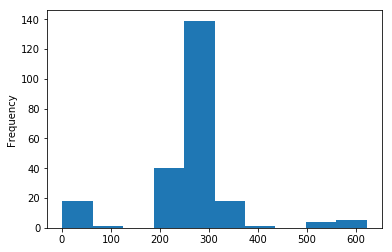

In [106]:
df.title.value_counts().plot.hist();

Ada beberapa episode dengan jumlah percakapan yang kurang dari 200. hal ini disebabkan karena pada proses parsing, beberapa script tidak memiliki tag untuk setiap percakapan, sehingga terabaikan.

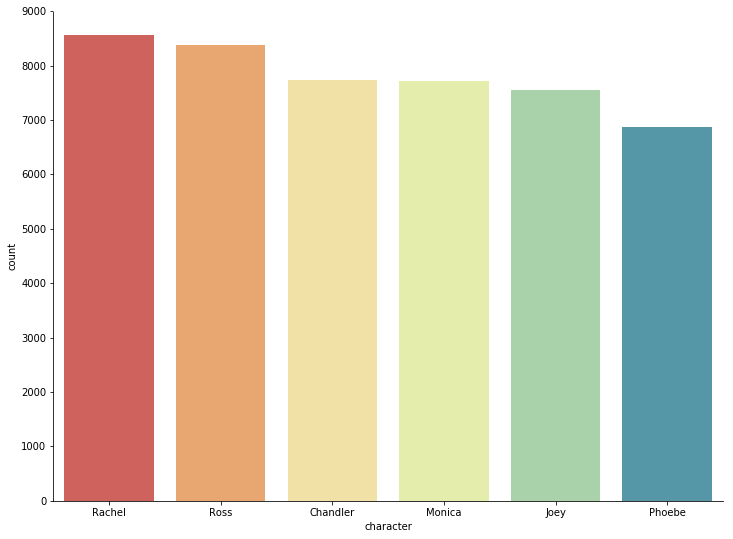

In [28]:
fig, ax = plt.subplots(figsize=(12,9))
sns.countplot(x=data['character'], ax=ax, palette='Spectral', order=data.character.value_counts().index)
sns.despine();

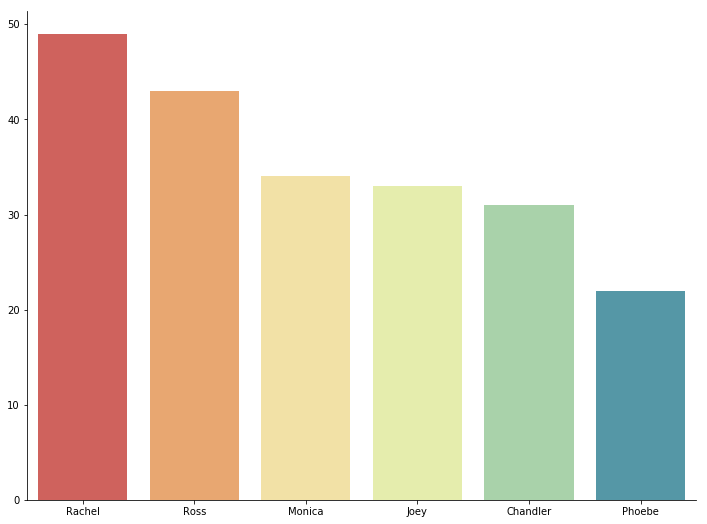

In [29]:
pivoted = data.pivot_table(index='title', columns = 'character', values='line', aggfunc='count').idxmax(axis=1).value_counts()

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(pivoted.index, pivoted.values, ax=ax, palette='Spectral');
sns.despine();

ternyata rachel sering menjadi central character di setiap episode (berdasarkan jumlah line)

In [12]:
'''ten_title = data.title.unique()[50:60]
data_10_title = data[data['title'].isin(ten_title)]

g = sns.FacetGrid(data_10_title, col="title", col_wrap=2, size=4, aspect=2, sharex=False)
g.map(sns.countplot, 'character');'''

'ten_title = data.title.unique()[50:60]\ndata_10_title = data[data[\'title\'].isin(ten_title)]\n\ng = sns.FacetGrid(data_10_title, col="title", col_wrap=2, size=4, aspect=2, sharex=False)\ng.map(sns.countplot, \'character\');'

In [13]:
from textblob import TextBlob

In [30]:
data.line

1         There's nothing to tell! He's just some guy I...
2         C'mon, you're going out with the guy! There's...
3         All right Joey, be nice.  So does he have a h...
4                                 Wait, does he eat chalk?
5         Just, 'cause, I don't want her to go through ...
6         Okay, everybody relax. This is not even a dat...
7                                Sounds like a date to me.
8         Alright, so I'm back in high school, I'm stan...
10        Then I look down, and I realize there's a pho...
11                                          Instead of...?
12                                           That's right.
13                                   Never had that dream.
14                                                     No.
15        All of a sudden, the phone starts to ring. No...
16                And they weren't looking at you before?!
17        Finally, I figure I'd better answer it, and i...
18                                         (mortified) H

In [38]:
data['sentiment'] = data.line.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [87]:
data['season'] = range(1, len(data)+1)

In [ ]:
data.title.unique()

In [96]:
season_dict = dict(zip(data.title.unique(), range(1, len(data.title.unique())+1)))

1

In [111]:
data['episode'] = data.title.map(season_dict)

In [113]:
eps_to_season = {1: range(1, 25),
                 2: range(25, 49),
                 3: range(49, 74),
                 4: range(74, 97),
                 5: range(97, 120),
                 6: range(120, 144),
                 7: range(144, 168),
                 8: range(168, 191),
                 9: range(191, 215),
                 10: range(215, 233),
                }

In [ ]:
sentiment_data = data[data['character'] == "Ross"].groupby('title')['sentiment'].median()
sentiment_data

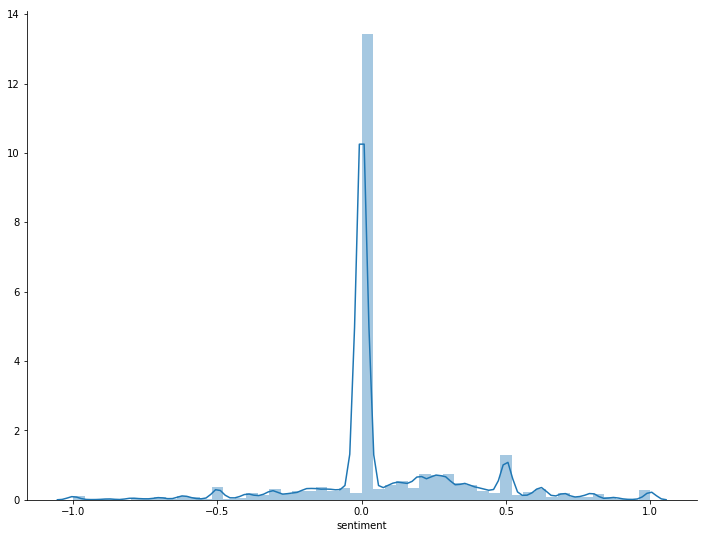

In [57]:
fig, ax = plt.subplots(figsize=(12,9))
sns.distplot(data.sentiment);
sns.despine()